## HW 7. Decision Trees 

1. Choose any dataset you want for binary classification with tabular data (it can be either a titanic or something more complex, but do not take pictures, texts, etc.), it is best to choose a dataset from Kaggle.
2. Make a basic EDA, write briefly a few conclusions that, in your opinion, will affect the model / model validation / metrics.
3. Describe your validation approach and metrics for this dataset.
4. Train and tune logistic regression (optimise the metric).
5. Do the same with a decision tree.
6. Visualize the decision tree and interpret the model (describe the most important features, whether the splits are logical, etc.)
7. If there is a test dataset, then make predictions on it and compare the result on lb with what you've got on validation (if there is no test dataset, then create it yourself, before training the model, separate 15-20% from the dataset and it will be your test). on the test, you run the model only once to find out the final result.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline


# EDA

In [18]:
train = pd.read_csv('/Users/dariyab/Desktop/projector/ML/Decision Trees /titanic/train.csv')
train.shape
train.head() 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Comment on missing values: 
#### Age has NaN
#### Name has a complication due to some nicknames 
#### Ticket has both numbers and letters 

## Feature descriptions: 
Categorical: Survived, Sex, and Embarked
Ordinal: Pclass 
Continous: Age, Fare. Discrete: SibSp, Parch.



## Characterization of numerical features

In [15]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Age range: infant - 80 y.o. Most passangers were between 25-34


## Characterization of categorical features

In [24]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [32]:
#Compare survival rates between men and women
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [35]:
#Compare survival rates between passanger classes 
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## Visualization: 


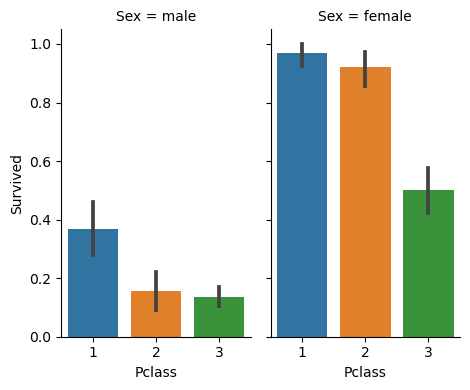

In [49]:
fig1 = sns.catplot(
    data=train, x="Pclass", y="Survived", col="Sex",
    kind="bar", height=4, aspect=.6,
)

In [48]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Some conclusions: 
Sex and Pclass could be good features to use for the prediction of survival. Females are more likely to survive than males. And first class is more likely to survive than 2nd class which is more likely to survive than third class.


### Validation approach and metrics
### The dataset is limited (few samples) and it's not balanced (a lot fewer survivors than non-survivors).
### Validation: we will stratify the data since it's an unbalanced dataset and can do a holdout (or if we have more time k-fold cross-validation). 
### Metrics: I will measure the accuracy of the classification and also the confusion matrix which will tell me precision and recall etc. 



## Training and tuning logistic regression:  


### Feature selection/Engineering 

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
#Selecting features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = train[features] #our features
y = train['Survived'] # the column we're trying to predict

In [72]:
#Filling missing values for some feature columns with the median of those columns. Robust to ouliers. 
X['Age'].fillna(X['Age'].median(), inplace = True) 
X['Fare'].fillna(X['Fare'].median(), inplace = True)
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,28.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [73]:
#Encoding the categorical variable of "Sex" into 0s and 1s. 

X = pd.get_dummies(X, columns =['Sex'], drop_first = True).astype(int)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22,1,0,7,1
1,1,38,1,0,71,0
2,3,26,0,0,7,0
3,1,35,1,0,53,0
4,3,35,0,0,8,1
...,...,...,...,...,...,...
886,2,27,0,0,13,1
887,1,19,0,0,30,0
888,3,28,1,2,23,0
889,1,26,0,0,30,1


## Data split, model training and evaluation

In [74]:
#Splitting the training set into train and test 
from sklearn.model_selection import train_test_split 

#stratifying our data based on the ['Survived'] column 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42, stratify = y) 

In [79]:
#Model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

#prediction based on X_test
y_pred = model.predict(X_test)

In [84]:
#Evaluation (accuracy, confusion matrix etc) 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8044692737430168
Confusion Matrix:
[[95 15]
 [20 49]]


Text(0.5, 427.9555555555555, 'Predicted label')

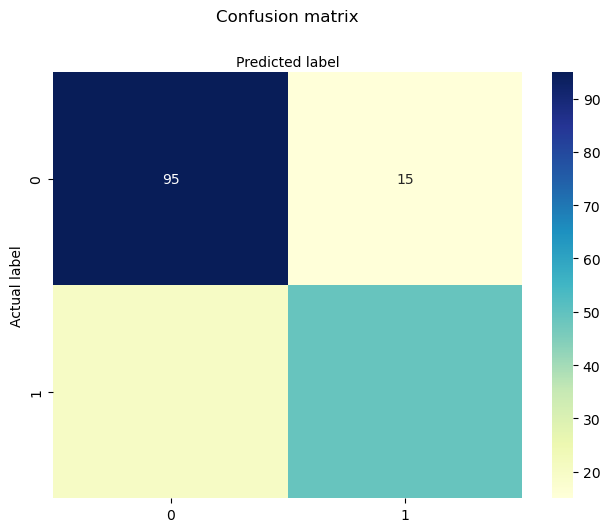

In [86]:
#Visualizing confusion matrix 

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
#More metrics
from sklearn.metrics import classification_report
target_names = ['Non-survivors', 'Survivors']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Non-survivors       0.83      0.86      0.84       110
    Survivors       0.77      0.71      0.74        69

     accuracy                           0.80       179
    macro avg       0.80      0.79      0.79       179
 weighted avg       0.80      0.80      0.80       179



### Some conclusions: This model is much better at prediction Non-survivors than survivors (the precision score for non-survivors is higher than survivors). 

In [93]:
#Tuning the model:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],               # Penalty type
    'solver': ['liblinear', 'saga']        # Solver
}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
target_names = ['Non-survivors', 'Survivors']
print(classification_report(y_test, y_pred, target_names=target_names))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8044692737430168
Confusion Matrix:
[[100  10]
 [ 25  44]]
               precision    recall  f1-score   support

Non-survivors       0.80      0.91      0.85       110
    Survivors       0.81      0.64      0.72        69

     accuracy                           0.80       179
    macro avg       0.81      0.77      0.78       179
 weighted avg       0.81      0.80      0.80       179



## Tuning the model doesn't change our accuracy but it gives us a much better precision score for the Survivor class  

# Decision Tree

In [96]:
#Training the decision tree model 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 42) 
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)

In [97]:
#Evaluating the model 
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)


# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
target_names = ['Non-survivors', 'Survivors']
print(classification_report(y_test, y_pred_tree, target_names=target_names))

Decision Tree Accuracy: 0.8212290502793296
Confusion Matrix:
[[94 16]
 [16 53]]
               precision    recall  f1-score   support

Non-survivors       0.85      0.85      0.85       110
    Survivors       0.77      0.77      0.77        69

     accuracy                           0.82       179
    macro avg       0.81      0.81      0.81       179
 weighted avg       0.82      0.82      0.82       179



In [113]:
#tuning the decision tree model 
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize decision tree classifier
decision_tree_tune = DecisionTreeClassifier(random_state=42)

# Initialize grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=decision_tree_tune, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy of Best Model:", accuracy_best)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy of Best Model: 0.8156424581005587


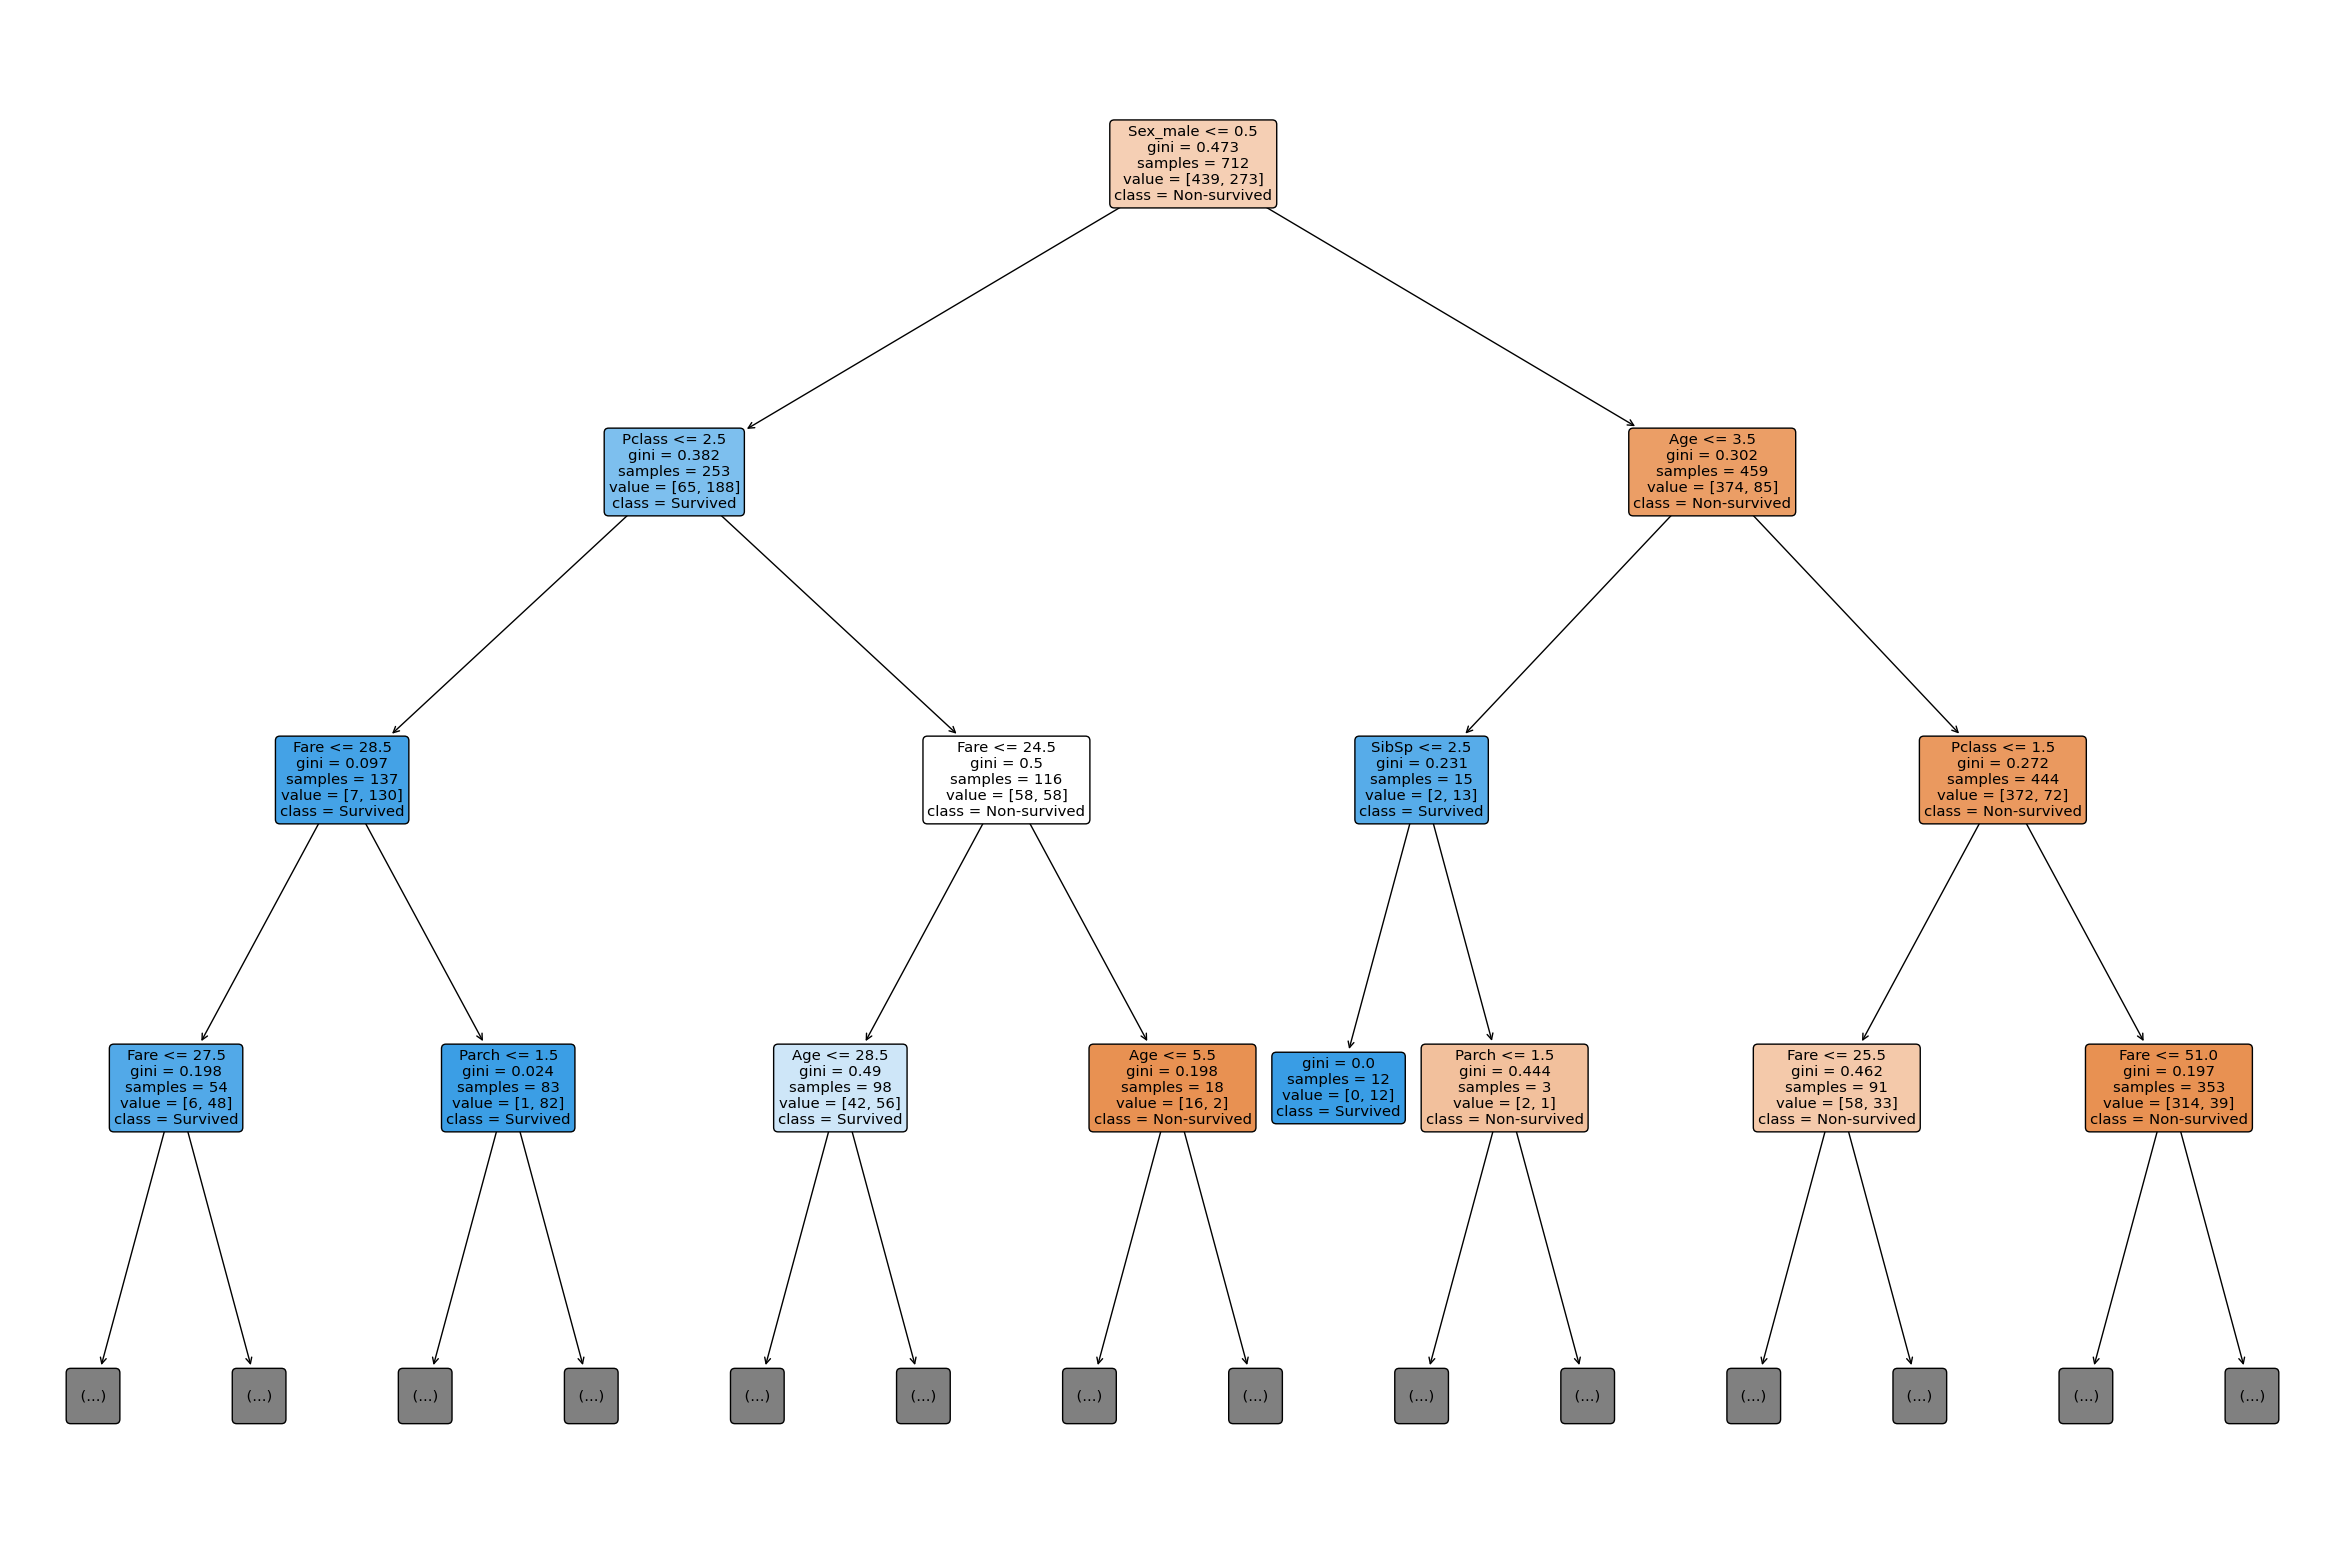

In [115]:
#Visualizing the decision tree model
#just showing the first three layers for readability but there are 10 layers in the model 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt #already imported above but just in case

#Plotting
plt.figure(figsize= (30,20))
plot_tree(decision_tree, feature_names = X.columns, class_names = ['Non-survived', 'Survived'], filled = True, rounded = True, max_depth = 3)
plt.savefig("titanic_decision_tree_2.pdf") 
plt.show()


## The model first splits the features by Sex which makes sense because whether or not the passanger was a female is a strong predictor of survival. Then the model splits things up into class (1st, and 2nd into one category and the 3rd class into another). As well as Age. These are logical steps. However, what was strange is that the model always sets the highest max_depth to be the best parameter. 

In [145]:
#Using the test dataset

titanic_test = pd.read_csv('/Users/dariyab/Desktop/projector/ML/Decision Trees /titanic/test.csv')
titanic_test_2 = titanic_test[features] #our features
titanic_test_2['Age'].fillna(X['Age'].median(), inplace = True) 
titanic_test_2['Fare'].fillna(X['Fare'].median(), inplace = True)
titanic_test_2 = pd.get_dummies(titanic_test_2, columns =['Sex'], drop_first = True).astype(int)
titanic_test_2["Survived"] = best_model.predict(titanic_test_2)

titanic_test_2.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.779904,0.447368,0.392344,35.133971,0.636364,0.356459
std,0.841838,12.686191,0.896760,0.981429,55.855855,0.481622,0.479527
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.000000,1.000000,0.000000
75%,3.000000,35.750000,1.000000,0.000000,31.000000,1.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.000000,1.000000,1.000000
